### Polynomial Interpolation using Lagrange shape functions

Define the function to interpolate

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def f(x):
  '''The function to be interpolated

  :param x: independent variable
  :type x: double or np.array of doubles
  :return: the value of f evaluated at x
  :rtype: double or np.array
  '''
  return 1.0/(1.0+x)

Construct the k-th Lagrange shape function from the nodes x coordinates at the x locations (np.array)

In [13]:
def lagrange_sf(x,k,node_x):
  '''Evaluates the generic Lagrange shape function

  :param x: the locations where to evaluate the shape function
  :type x: double or np.array
  :param k: the function to be evaluated from 0 to len(node_x)-1. This is 1.0 at x_k and zero at the other points.
  :type k: int
  :param node_x: the x locations where the values of f are known. 
  :type node_x: list or np.array containing double x locations
  :raises Exception: Generic exception when k has an invalid range
  :return: the Lagrange shape functions evaluated at x.
  :rtype: double, list or np.array, depending on x and node_x.
  '''
  # Polynomial order
  n = len(node_x)-1
  if(k < 0)or(k > n):
    raise Exception("ERROR: invalid k")
  else:
    # Construct Lagrange shape functions    
    res = np.ones(len(x))
    for j in range(n+1):
      if(j == k):
        continue
      else:
        res *= (x-node_x[j])/(node_x[k]-node_x[j])
  return res

Plot the $k$-th Lagrange shape function, observing that it is equalt to $1$ at $x_{k}$.
It is also equal to $0$ at $x_{i},\,\forall\,i\ne k$.

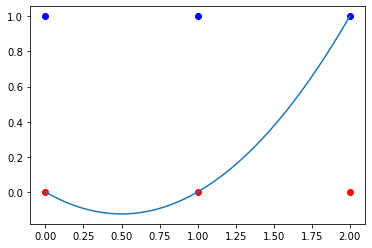

In [14]:
node_x = np.array([0,1.0,2.0])
node_y = f(node_x)

x = np.linspace(0,2,100)

plt.plot(node_x,[0,0,0],'ro')
plt.plot(node_x,[1,1,1],'bo')
plt.plot(x,lagrange_sf(x,2,node_x))
plt.show()

Now construct the complete Lagrange interpolating polynomial, as a linear combination of shape functions and values of $f$ at $x_{0},x_{1},\dots,x_{n}$.

In [15]:
def lagrange_int(x,node_x,node_y):
  '''Constructs the Lagrange polynomial interpolant

  :param x: the x locations where the interpolanting polynomial needs to be evaluated
  :type x: double or np.array
  :param node_x: the x coordinates of the known locations. 
  :type node_x: list or np.array
  :param node_y: the y coordinates of the known locations. 
  :type node_y: list or np.array
  :return: the Lagrange polynomial evaluated at x
  :rtype: list or np.array
  '''
  n = len(node_x)-1
  res = np.zeros(len(x))
  for j in range(n+1):
    res += lagrange_sf(x,j,node_x)*node_y[j]
  return res

Compare the interpolating polynomial and the original function.

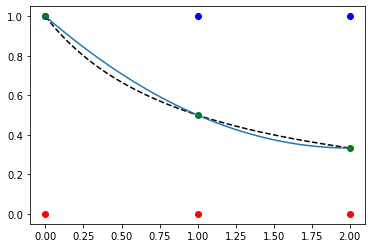

In [16]:
node_x = np.array([0.0,1.0,2.0])
node_y = f(node_x)

x = np.linspace(0,2,100)

plt.plot(node_x,[0,0,0],'ro')
plt.plot(node_x,[1,1,1],'bo')
plt.plot(node_x,node_y,'go')
plt.plot(x,f(x),'k--')
plt.plot(x,lagrange_int(x,node_x,node_y))
plt.show()